# Teoria da Busca - RPG Game (Cega e Heuristica)

In [52]:
# Importação de bibliotecas
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq

In [53]:
# Criar os grafos
G_game = nx.Graph()

# Localizações do mapa (grafo)
locais = {
    "Castelo do Herói": (50,400),
    "Vila dos Elfos": (70,80),
    "Fortaleza dos Nativos": (90, 120),
    "Ilha de Woompa": (105, 85),
    "Floresta dos Desafios": (120, 130),
    "Laboratório do Iceberg": (140, 50),
    "Cidade de Lavender": (150, 120),
    "O Grande Salão": (180, 200),
    "Corte do Rei Carmesim": (200, 230),
    "Academia do Mal": (225, 300),
    "Caverna da Bruxa": (300, 400)
}

# Conexões entre os nós (arestas)
G_game.add_edge('Castelo do Herói', 'Vila dos Elfos', weight=10)
G_game.add_edge('Castelo do Herói', 'Fortaleza dos Nativos', weight=12)

G_game.add_edge('Vila dos Elfos', 'Ilha de Woompa', weight=5)
G_game.add_edge('Fortaleza dos Nativos', 'Ilha de Woompa', weight=2)

G_game.add_edge('Ilha de Woompa', 'Floresta dos Desafios', weight=8)

G_game.add_edge('Floresta dos Desafios', 'Laboratório do Iceberg', weight=12)

G_game.add_edge('Laboratório do Iceberg', 'Cidade de Lavender', weight=10)
G_game.add_edge('Laboratório do Iceberg', 'Vila dos Elfos', weight=30)

G_game.add_edge('Cidade de Lavender', 'O Grande Salão', weight=15)

G_game.add_edge('O Grande Salão', 'Corte do Rei Carmesim', weight=8)

G_game.add_edge('Corte do Rei Carmesim', 'Academia do Mal', weight=13)

G_game.add_edge('Academia do Mal', 'Caverna da Bruxa', weight=15)

In [54]:
# Colocando posições no gráfico
for local, pos in locais.items():
    G_game.nodes[local]['pos'] = pos

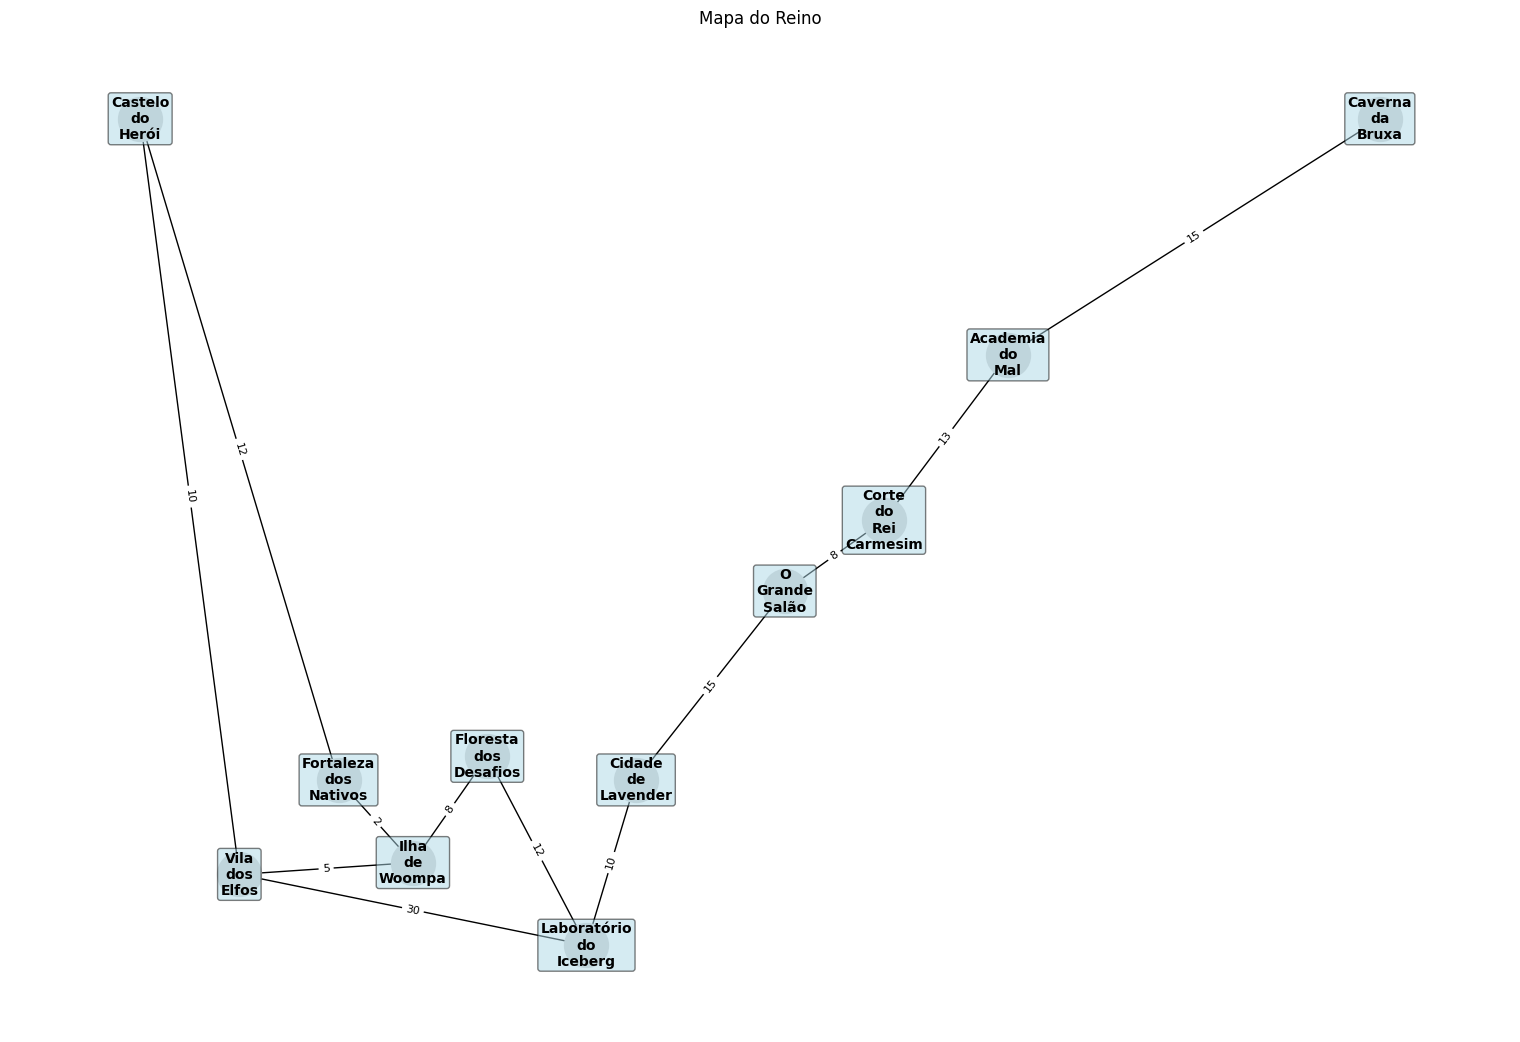

In [ ]:
# Função para plotar o mapa (corrigida para lidar com caminhos vazios ou de um nó)
def plot_map(grafo, caminho_encontrado, titulo='Mapa do Reino'):
    pos = nx.get_node_attributes(grafo, 'pos')
    pesos = nx.get_edge_attributes(grafo, 'weight')

    plt.figure(figsize=(15,10))

    nx.draw(
        grafo, 
        pos, 
        with_labels=True,
        node_size=1000,
        node_color='lightgray',
        font_size=10,
        font_weight='bold',
        labels={node: node.replace(' ', '\n') for node in grafo.nodes()},
        bbox=dict(
            facecolor='lightblue',
            alpha=0.5,
            edgecolor='black',
            boxstyle='round,pad=0.2'
        )
    )
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=pesos, font_size=8, label_pos=0.5)

    if caminho_encontrado and len(caminho_encontrado) > 0:
        # Destacar início e objetivo
        nx.draw_networkx_nodes(
            grafo,
            pos,
            nodelist=[caminho_encontrado[0]],
            node_color='green',
            node_size=700,
            label='Início'
        )
        if len(caminho_encontrado) > 1:
            nx.draw_networkx_nodes(
                grafo,
                pos,
                nodelist=[caminho_encontrado[-1]],
                node_color='purple',
                node_size=700,
                label='Objetivo'
            )
        # Destacar caminho
        nx.draw_networkx_nodes(
            grafo,
            pos,
            nodelist=caminho_encontrado,
            node_color='red',
            node_size=500,
            label='Caminho'
        )
        # Destacar arestas do caminho
        if len(caminho_encontrado) > 1:
            caminho_arestas = list(zip(caminho_encontrado, caminho_encontrado[1:]))
            nx.draw_networkx_edges(
                grafo,
                pos,
                edgelist=caminho_arestas,
                edge_color='red',
                width=3
            )
        # Texto para início e objetivo
        plt.text(
            pos[caminho_encontrado[0]][0],
            pos[caminho_encontrado[0]][1] + 30,
            'Início',
            fontsize=12,
            ha='center',
            va='center',
            color='green'
        )
        if len(caminho_encontrado) > 1:
            plt.text(
                pos[caminho_encontrado[-1]][0],
                pos[caminho_encontrado[-1]][1] + 30,
                'Objetivo',
                fontsize=12,
                ha='center',
                va='center',
                color='purple'
            )

    plt.title(titulo)
    plt.axis('off')
    plt.show()

plot_map(G_game, [])

## Algoritmos de Busca

### Busca em Largura (BFF)

In [56]:
# BFS (Busca em Largura) corrigida
def bfs_search(grafo, inicio, objetivo):
    visitados = set()
    fila = deque([(inicio, [inicio], 0)])  # (nó atual, caminho até aqui, custo até aqui)

    if inicio == objetivo:
        return [inicio], 0

    while fila:
        no_atual, caminho, custo_total = fila.popleft()

        if no_atual == objetivo:
            return caminho, custo_total

        if no_atual not in visitados:
            visitados.add(no_atual)
            for vizinho in grafo[no_atual]:
                if vizinho not in visitados:
                    novo_caminho = list(caminho)
                    novo_caminho.append(vizinho)
                    novo_custo = custo_total + grafo[no_atual][vizinho]['weight']
                    fila.append((vizinho, novo_caminho, novo_custo))
    return None, None

Caminho encontrado: Castelo do Herói -> Vila dos Elfos -> Laboratório do Iceberg -> Cidade de Lavender -> O Grande Salão -> Corte do Rei Carmesim -> Academia do Mal -> Caverna da Bruxa
Custo total: 101


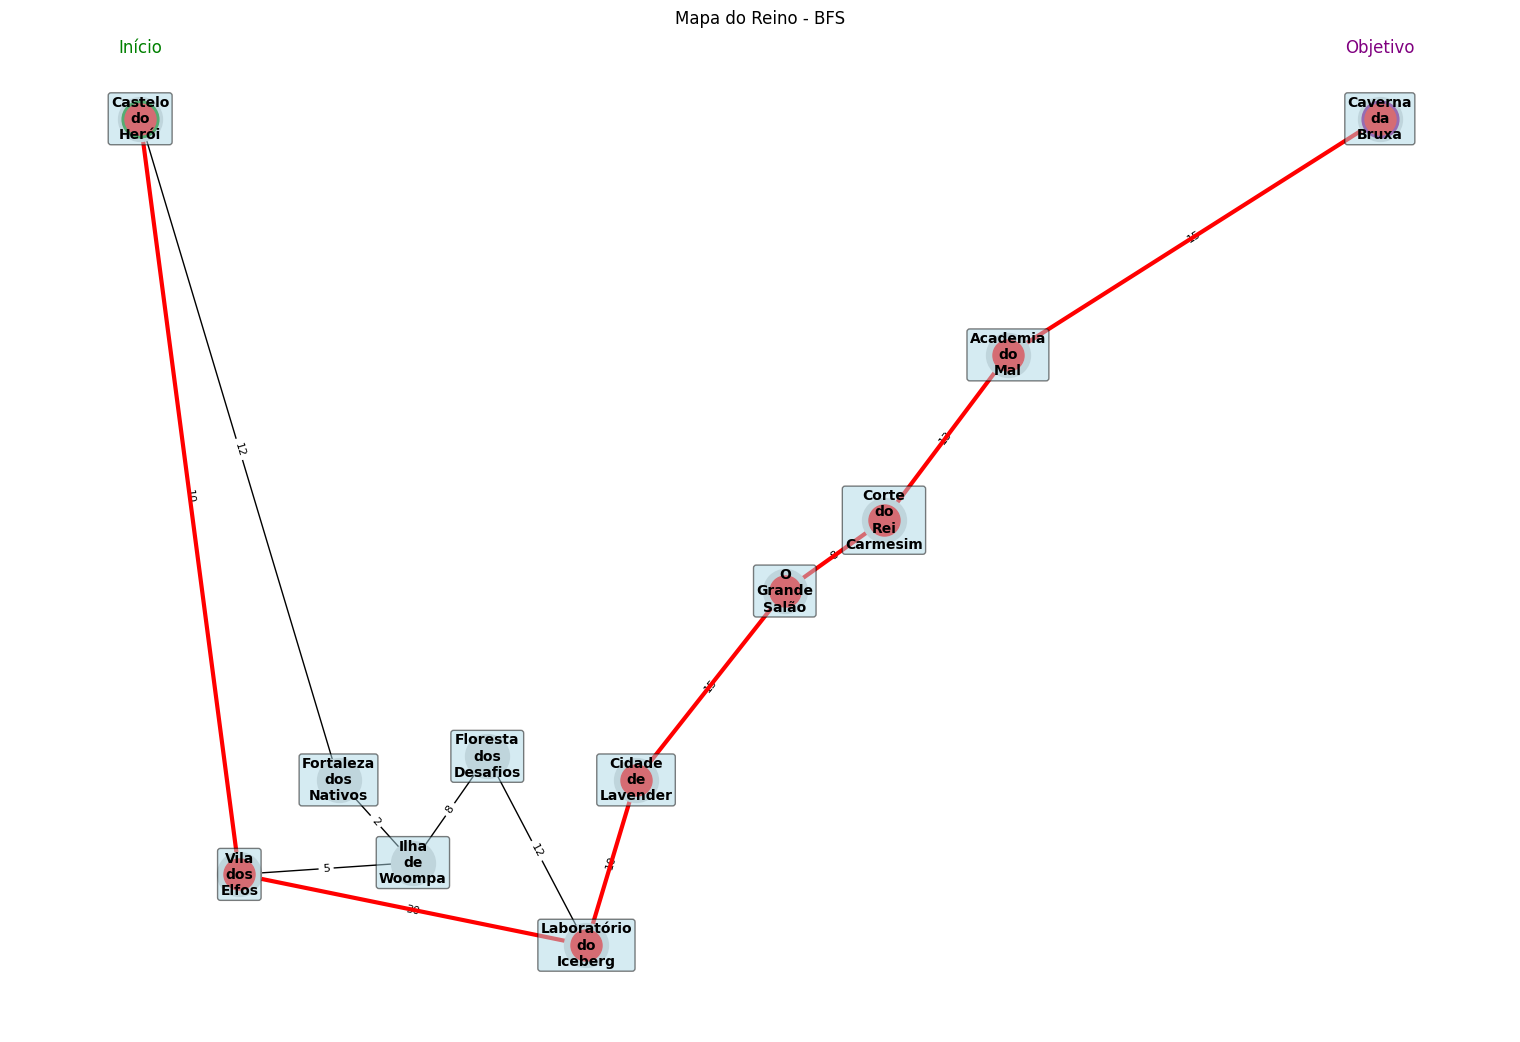

In [57]:
# Efetuando a busca
inicio_heroi = "Castelo do Herói"
objetivo_heroi = "Caverna da Bruxa"

caminho_bfs, custo_bfs = bfs_search(G_game, inicio_heroi, objetivo_heroi)

if caminho_bfs:
    print(f"Caminho encontrado: {' -> '.join(caminho_bfs)}")
    print(f"Custo total: {custo_bfs}")
    plot_map(G_game, caminho_bfs, titulo='Mapa do Reino - BFS')